In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore', category=Warning)


In [ ]:
#Fetching Average Pooling Dataset
import os

# Specify the folder path
folder_path = "/content/drive/MyDrive/pooled_data/"

# Error handling: Check if folder exists
if not os.path.exists(folder_path):
    raise ValueError(f"Folder '{folder_path}' does not exist. Please provide a valid path.")

# Create an empty list to store the files
sample = []

# Iterate through files in the folder using os.listdir()
for filename in os.listdir(folder_path):
    # Check if it's a file (not a directory) using os.path.isfile()
    if os.path.isfile(os.path.join(folder_path, filename)):
        # Construct the full path to the file
        full_path = os.path.join(folder_path, filename)

        data = pd.read_csv(full_path, header=None)

        # Process the data
        print(f"Processing file: {filename}")

        sample.append(data)

In [ ]:

labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust"]*16


print(labels)


['Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad'

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(sample, labels, test_size=.2, random_state=42)

# KFold cross-validation loop
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []  # To store evaluation metrics (e.g., accuracy)

for train_index, val_index in kfold.split(X_train):
  # Split the training data further for train and validation sets within each fold
  X_train_fold = [X_train[i] for i in train_index]
  X_val_fold = [X_train[i] for i in val_index]
  y_train_fold = [y_train[i] for i in train_index]
  y_val_fold = [y_train[i] for i in val_index]


X_train_fold = np.array(X_train_fold)
X_val_fold = np.array(X_val_fold)
y_train_fold = np.array(y_train_fold)
y_val_fold = np.array(y_val_fold)


In [ ]:
#Scaling
scaler = StandardScaler()
for x in X_train_fold:
  scaler.fit(x[:, 1:])

X_train_fold_scaled = []
for x in X_train_fold:
  X_train_fold_scaled.append(scaler.transform(x[:, 1:]))
X_train_fold_scaled = np.array(X_train_fold_scaled)

X_te = []
for x in X_test:
  X_te.append(scaler.transform(x[:, 1:]))
x_test = np.array(X_te)

X_val = []
for x in X_val_fold:
  X_val.append(scaler.transform(x[:, 1:]))
X_val_fold = np.array(X_val)





In [ ]:
print(X_train_fold_scaled.shape)
print(X_val_fold.shape)
print(x_test.shape)

(173, 62, 59399)
(19, 62, 59399)
(48, 62, 59399)


In [ ]:
#One Hot Encoding
encoder = OneHotEncoder(sparse=False)
encoder.fit(np.array(y_train_fold).reshape(-1, 1))
y_train_fold_encoded = encoder.transform(np.array(y_train_fold).reshape(-1, 1))
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))
y_val_fold = encoder.transform(np.array(y_val_fold).reshape(-1, 1))

In [ ]:
print(y_train_fold_encoded.shape)
print(y_test.shape)
print(y_val_fold.shape)

(173, 5)
(48, 5)
(19, 5)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64,return_sequences=True, input_shape=(X_train_fold_scaled.shape[1],X_train_fold_scaled.shape[2])),
    tf.keras.layers.LSTM(64),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(5, activation = tf.nn.softmax)
])


In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64,return_sequences=True, input_shape=(X_train_fold_scaled.shape[1],X_train_fold_scaled.shape[2])),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(5, activation = tf.nn.softmax)
])


In [ ]:
optimizer = optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])

In [ ]:
optimizer = optimizers.Adam()
model2.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            5085184   
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                        

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            5085184   
                                                                 
 lstm_1 (LSTM)               (None, 20, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                        

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True, to_file='model.png')

In [ ]:
tf.keras.utils.plot_model(model2,show_shapes = True, to_file='model.png')

In [ ]:
checkpoint = callbacks.ModelCheckpoint('RNN_avgmodel_detect_emotional.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
csv_logger = callbacks.CSVLogger('training.log')
callbacks_list = [checkpoint, reduce_lr, csv_logger, early_stopping]

In [ ]:
checkpoint2 = callbacks.ModelCheckpoint('RNN _avgmodel_detect_emotional2.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping2 = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr2 = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
csv_logger2 = callbacks.CSVLogger('training.log')
callbacks_list2 = [checkpoint2, reduce_lr2, csv_logger2, early_stopping2]

In [ ]:
#average pooling Model 1
history =   model.fit(X_train_fold_scaled, y_train_fold_encoded, epochs= 50, validation_data=(X_val_fold, y_val_fold),callbacks=callbacks_list).history

Epoch 1/50
6/6 [==============================] - ETA: 0s - loss: 1.6589 - acc: 0.3353 - recall: 0.0578 - auc: 0.6070 - precision: 0.3571
Epoch 1: val_loss improved from inf to 1.55129, saving model to RNN_avgmodel_detect_emotional.h5
6/6 [==============================] - 6s 391ms/step - loss: 1.6589 - acc: 0.3353 - recall: 0.0578 - auc: 0.6070 - precision: 0.3571 - val_loss: 1.5513 - val_acc: 0.2632 - val_recall: 0.0000e+00 - val_auc: 0.6825 - val_precision: 0.0000e+00 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - ETA: 0s - loss: 0.9726 - acc: 0.6879 - recall: 0.3526 - auc: 0.9110 - precision: 0.8971
Epoch 2: val_loss improved from 1.55129 to 1.51827, saving model to RNN_avgmodel_detect_emotional.h5
6/6 [==============================] - 1s 193ms/step - loss: 0.9726 - acc: 0.6879 - recall: 0.3526 - auc: 0.9110 - precision: 0.8971 - val_loss: 1.5183 - val_acc: 0.4211 - val_recall: 0.0000e+00 - val_auc: 0.7348 - val_precision: 0.0000e+00 - lr: 0.0010
Epoch 3/50
6/6 [==

In [ ]:

 loss, fold_accuracy,a,a2,a1 = model.evaluate(X_val_fold, y_val_fold)
 cvscores.append(fold_accuracy)

# Print the average accuracy across all folds
print(f"K-Fold Cross-Validation Accuracy: {np.mean(cvscores)}")

1/1 [==============================] - 0s 84ms/step - loss: 0.8297 - acc: 0.7368 - recall: 0.5263 - auc: 0.9231 - precision: 0.9091
K-Fold Cross-Validation Accuracy: 0.7368420958518982


In [ ]:
#average pooling Model 2
history2 =   model2.fit(X_train_fold_scaled, y_train_fold_encoded, epochs=40, validation_data=(X_val_fold, y_val_fold),callbacks=callbacks_list2).history

Epoch 1/40
6/6 [==============================] - ETA: 0s - loss: 1.5597 - acc: 0.3353 - recall_1: 0.0289 - auc_1: 0.6113 - precision_1: 0.8333
Epoch 1: val_loss improved from inf to 1.57097, saving model to RNN _avgmodel_detect_emotional2.h5
6/6 [==============================] - 8s 426ms/step - loss: 1.5597 - acc: 0.3353 - recall_1: 0.0289 - auc_1: 0.6113 - precision_1: 0.8333 - val_loss: 1.5710 - val_acc: 0.4737 - val_recall_1: 0.0000e+00 - val_auc_1: 0.7147 - val_precision_1: 0.0000e+00 - lr: 0.0010
Epoch 2/40
6/6 [==============================] - ETA: 0s - loss: 1.0686 - acc: 0.6532 - recall_1: 0.2197 - auc_1: 0.9029 - precision_1: 0.8837
Epoch 2: val_loss improved from 1.57097 to 1.52112, saving model to RNN _avgmodel_detect_emotional2.h5
6/6 [==============================] - 1s 199ms/step - loss: 1.0686 - acc: 0.6532 - recall_1: 0.2197 - auc_1: 0.9029 - precision_1: 0.8837 - val_loss: 1.5211 - val_acc: 0.3158 - val_recall_1: 0.0000e+00 - val_auc_1: 0.7479 - val_precision_1: 0.

In [ ]:
  loss1, fold_accuracy,c,v,b = model2.evaluate(X_val_fold, y_val_fold)
  cvscores.append(fold_accuracy)

# Print the average accuracy across all folds
print(f"K-Fold Cross-Validation Accuracy: {np.mean(cvscores)}")

1/1 [==============================] - 0s 71ms/step - loss: 0.6513 - acc: 0.6842 - recall_1: 0.6842 - auc_1: 0.9477 - precision_1: 0.7647
K-Fold Cross-Validation Accuracy: 0.710526317358017


In [ ]:
loss,acc,rec,auc,pre=model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 40ms/step - loss: 0.9333 - acc: 0.6875 - recall: 0.5417 - auc: 0.8833 - precision: 0.7879


In [ ]:
loss2,acc2,rec2,auc2,pre2=model2.evaluate(x_test, y_test)

2/2 [==============================] - 0s 48ms/step - loss: 1.0070 - acc: 0.6458 - recall_1: 0.5833 - auc_1: 0.8841 - precision_1: 0.7000


In [ ]:
#average pooling Model 1 Model 2
print("accuracy:",acc,"  ,",acc2)
print("precision:",pre,"  ,",pre2)
print("recall:",rec,"  ,",rec2)
print("Area under Curve:",auc,"  ,",auc2)
f1 = 2*(pre*rec)/(pre+rec)
f2 = 2*(pre2*rec2)/(pre2+rec2)
print("f1 score:",f1,"  ,",f2)

accuracy: 0.6875   , 0.6458333134651184
precision: 0.7878788113594055   , 0.699999988079071
recall: 0.5416666865348816   , 0.5833333134651184
Area under Curve: 0.88330078125   , 0.8840603232383728
f1 score: 0.6419753303907209   , 0.6363636196152237


In [ ]:
#average pooling Model 1 classification report

from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, output_dict=True)  # Convert one-hot labels to class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

# Access specific metrics (optional)
precision = report['accuracy']  # Overall accuracy
recall = report['weighted avg']['recall']  # Average recall
f1_score = report['weighted avg']['f1-score']  # Average F1-score

# Print specific metrics (optional)
print(f"Overall Accuracy: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {f1_score}")

2/2 [==============================] - 1s 39ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.71      0.50      0.59        10
           2       0.47      0.54      0.50        13
           3       0.70      0.88      0.78         8
           4       0.86      0.67      0.75         9

    accuracy                           0.69        48
   macro avg       0.73      0.72      0.71        48
weighted avg       0.70      0.69      0.69        48

Overall Accuracy: 0.6875
Average Recall: 0.6875
Average F1-Score: 0.6850830610021786


In [ ]:
#average pooling Model 2 classification report

y_pred1 = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred1, axis=1)
# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, output_dict=True)  # Convert one-hot labels to class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

# Access specific metrics (optional)
precision = report['accuracy']  # Overall accuracy
recall = report['weighted avg']['recall']  # Average recall
f1_score = report['weighted avg']['f1-score']  # Average F1-score

# Print specific metrics (optional)
print(f"Overall Accuracy: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {f1_score}")

2/2 [==============================] - 1s 40ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.75      0.60      0.67        10
           2       0.57      0.31      0.40        13
           3       0.75      0.75      0.75         8
           4       0.62      0.89      0.73         9

    accuracy                           0.65        48
   macro avg       0.65      0.68      0.65        48
weighted avg       0.65      0.65      0.63        48

Overall Accuracy: 0.6458333333333334
Average Recall: 0.6458333333333334
Average F1-Score: 0.6252525252525253


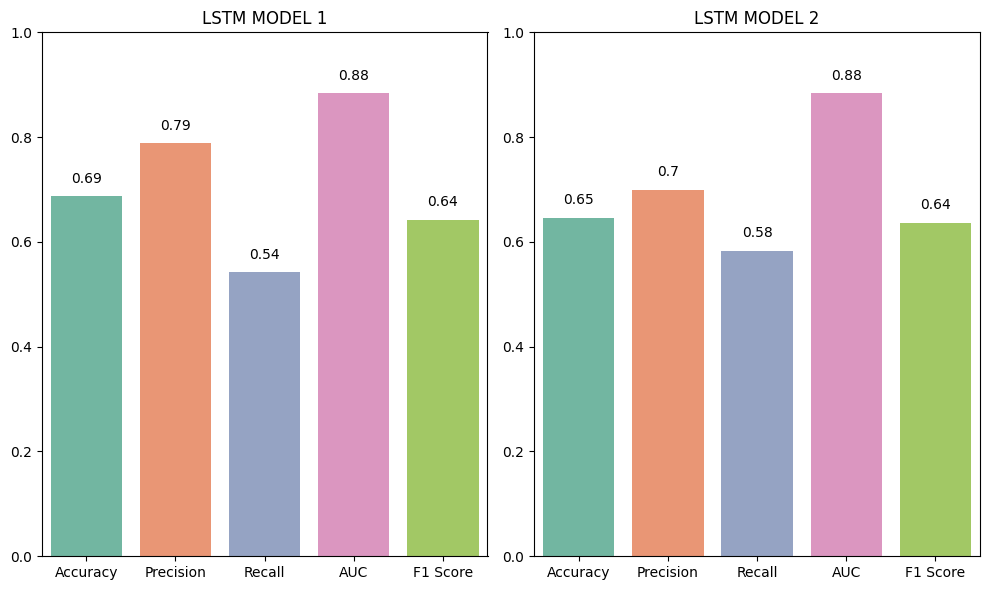

In [ ]:
#average pooling LSTM Metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics and models
models = ['Accuracy','Precision','Recall','AUC','F1 Score']

accuracy_values = [acc,pre,rec,auc,f1]
accuracy_values2 = [acc2,pre2,rec2,auc2,f2 ]


# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy_values, palette='Set2')
plt.title('LSTM MODEL 1')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1

# Add text labels for accuracy values
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

# Plot precision
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=accuracy_values2, palette='Set2')
plt.title('LSTM MODEL 2')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1


# Add text labels for precision values
for i, v in enumerate(accuracy_values2):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

2/2 [==============================] - 0s 40ms/step


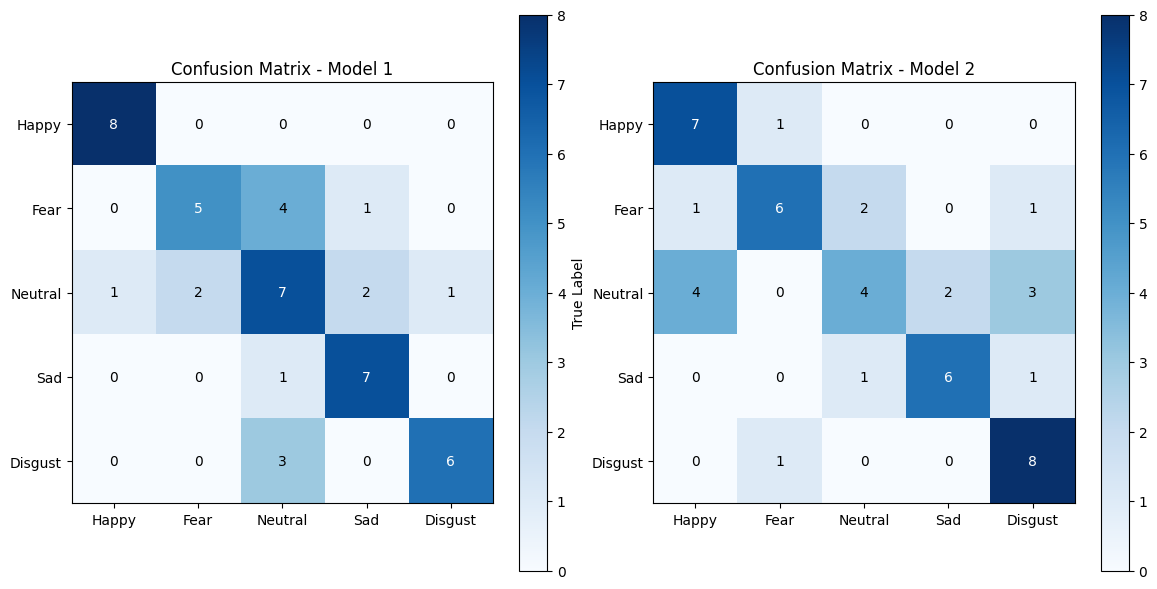

In [ ]:
#average pooling LSTM confusion matrix

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels, title):

  labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust"]

  plt.figure(figsize=(12, 6))  # Adjust figure size as needed

  # Plot confusion matrix for model 1 on the left
  plt.subplot(1, 2, 1)
  plt.imshow(cm1, interpolation='nearest', cmap='Blues')
  plt.title("Confusion Matrix - Model 1")
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)

  # Normalize confusion matrix values to display percentages instead of raw counts

  thresh = cm1.max() / 2.
  for i in range(len(cm1)):
    for j in range(len(cm1[0])):
      plt.text(j, i, format(cm1[i, j]),  # Display percentages with 2 decimal places
               ha="center", va="center",
               color="white" if cm1[i, j] > thresh else "black")

  # Plot confusion matrix for model 2 on the right
  plt.subplot(1, 2, 2)
  plt.imshow(cm2, interpolation='nearest', cmap='Blues')
  plt.title("Confusion Matrix - Model 2")
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)

  # Normalize confusion matrix values to display percentages (similar to model 1)

  thresh = cm2.max() / 2.
  for i in range(len(cm2)):
    for j in range(len(cm2[0])):
      plt.text(j, i, format(cm2[i, j]),
               ha="center", va="center",
               color="white" if cm2[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.show()

# Calculate confusion matrices
y_pred1 = model.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
cm1 = confusion_matrix(y_test.argmax(axis=1), y_pred_classes1)

y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
cm2 = confusion_matrix(y_test.argmax(axis=1), y_pred_classes2)

# Create the side-by-side confusion matrix plot
plot_confusion_matrix(cm1, list(set(y_test.argmax(axis=1))), cm2)
